## Use the ucl repository to download the heart disease data

In [102]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
heart_disease = heart_disease

# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets

# print(X)
# print(y)

# print(X.columns)
# print(y.columns)

# # metadata 
# print(heart_disease.metadata) 
  
# # variable information 
# print(heart_disease.variables) 

# Combine X and y into a single DataFrame
data = X.copy()  # Copy features DataFrame to avoid modifying the original
data['Target'] = y  # Add the target column to the combined DataFrame
# print(data)


## Data Preprocessing Required

In [103]:
import pandas as pd 
# Taking care of missing data
# Check for missing values
# print(data.isnull().sum())

# Option 1: Fill missing values (e.g., with mean, median, mode)
# data = data.fillna(data.mean())  # You could also use `data.fillna(data.median())`

# Option 2: Drop rows with missing values
data = data.dropna()
# print(data.isnull().sum())
# print(data)


In [104]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

# Use one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_columns)
# print(data)

Index([], dtype='object')


In [105]:
from sklearn.model_selection import train_test_split
X = data.drop(['Target'], axis = 1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [106]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

## 1. Logistic Regreesion 

In [107]:
from sklearn.linear_model import LogisticRegression
LogReg_classifier = LogisticRegression(random_state = 42)
LogReg_classifier.fit(X_train, y_train)
y_pred = LogReg_classifier.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
LR_cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix for Log Regression: \n {LR_cm}")
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for Log Regression: {accuracy_score*100}%")

Confusion matrix for Log Regression: 
 [[28  1  1  0  0]
 [ 7  3  1  1  0]
 [ 1  1  2  2  1]
 [ 0  1  3  2  0]
 [ 2  1  2  0  0]]
Accuracy Score for Log Regression: 58.333333333333336%


In [109]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LogReg_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\Davide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 60.34 %
Standard Deviation: 9.35 %


## 2. XGBoost Classification  

In [110]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier(random_state = 42)
XGB_classifier.fit(X_train, y_train)
y_pred = XGB_classifier.predict(X_test)

In [111]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
XGB_cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix for XGBoost: \n {XGB_cm}")
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for XGBoost: {accuracy_score*100}%")

Confusion matrix for XGBoost: 
 [[24  6  0  0  0]
 [ 6  2  2  2  0]
 [ 1  2  1  3  0]
 [ 0  4  1  1  0]
 [ 1  2  1  1  0]]
Accuracy Score for XGBoost: 46.666666666666664%


In [112]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGB_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\Davide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 57.84 %
Standard Deviation: 6.99 %


## 3. Support Vector Classification 

In [113]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
SV_classifier = SVC(kernel = 'linear', random_state = 42)
SV_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = SV_classifier.predict(X_test)

In [114]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
SV_cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix for Support Vector: \n {SV_cm}")
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for Support Vector: {accuracy_score*100}%")

Confusion matrix for Support Vector: 
 [[27  2  1  0  0]
 [ 9  1  1  1  0]
 [ 1  1  3  2  0]
 [ 1  1  3  1  0]
 [ 2  2  1  0  0]]
Accuracy Score for Support Vector: 53.333333333333336%


In [115]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SV_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 56.97 %
Standard Deviation: 4.34 %


C:\Users\Davide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


## 4. Kernal Support Vector Classification  

In [116]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
KSV_classifier = SVC(kernel = 'rbf', random_state = 42)
KSV_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = KSV_classifier.predict(X_test)

In [117]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
KSV_cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix for Kernal Support Vector: \n {KSV_cm}")
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for Kernal Support Vector: {accuracy_score*100}%")

Confusion matrix for Kernal Support Vector: 
 [[28  2  0  0  0]
 [ 9  2  1  0  0]
 [ 2  2  1  2  0]
 [ 2  2  2  0  0]
 [ 2  1  0  2  0]]
Accuracy Score for Kernal Support Vector: 51.66666666666667%


In [118]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = KSV_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 57.77 %
Standard Deviation: 6.19 %


C:\Users\Davide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


## 5. Random Forest Classification  

In [119]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RF_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = RF_classifier.predict(X_test)

In [120]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
RF_cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix for Randomm Forest: \n {RF_cm}")
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for Randomm Forest: {accuracy_score*100}%")

Confusion matrix for Randomm Forest: 
 [[26  4  0  0  0]
 [ 7  3  0  2  0]
 [ 4  1  1  1  0]
 [ 2  2  1  1  0]
 [ 1  2  0  2  0]]
Accuracy Score for Randomm Forest: 51.66666666666667%


In [121]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\Davide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 59.06 %
Standard Deviation: 6.56 %


## 6. .K-Nearest Neighbour classification

In [122]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = KNN_classifier.predict(X_test)

In [123]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
KNN_cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix for KNN: \n {KNN_cm}")
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for KNN: {accuracy_score*100}%")

Confusion matrix for KNN: 
 [[28  1  0  0  1]
 [ 8  2  1  0  1]
 [ 2  0  5  0  0]
 [ 0  4  2  0  0]
 [ 2  1  1  1  0]]
Accuracy Score for KNN: 58.333333333333336%


In [124]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 57.79 %
Standard Deviation: 5.03 %


C:\Users\Davide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


# Plotting Heart Disease data in various ways

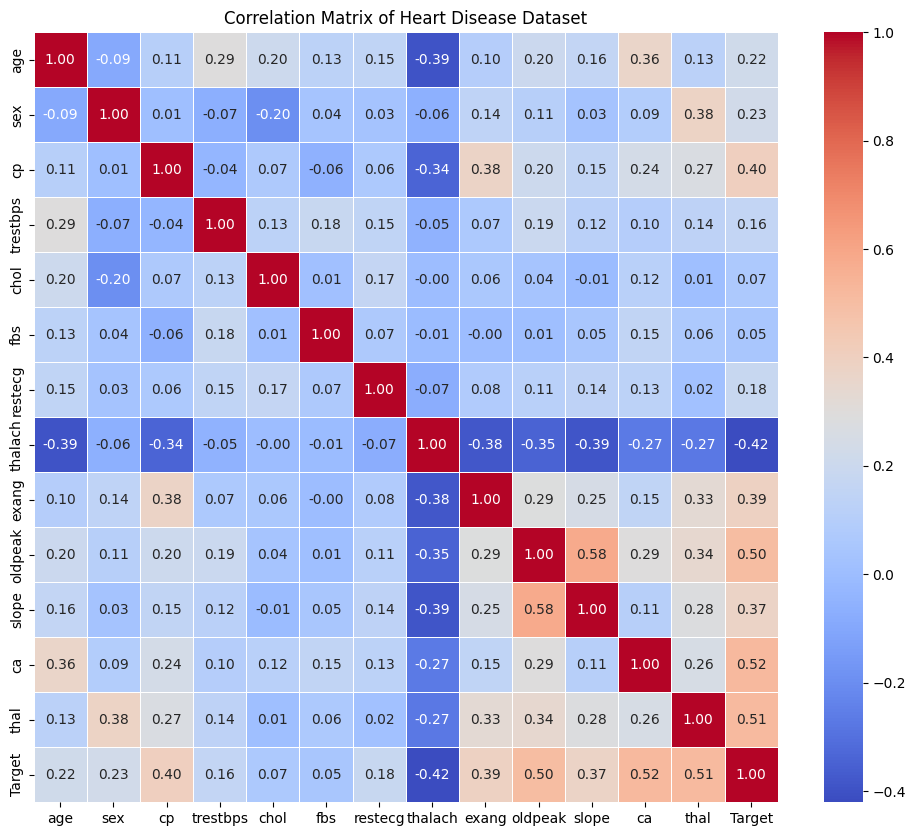

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Heart Disease Dataset")
plt.show()

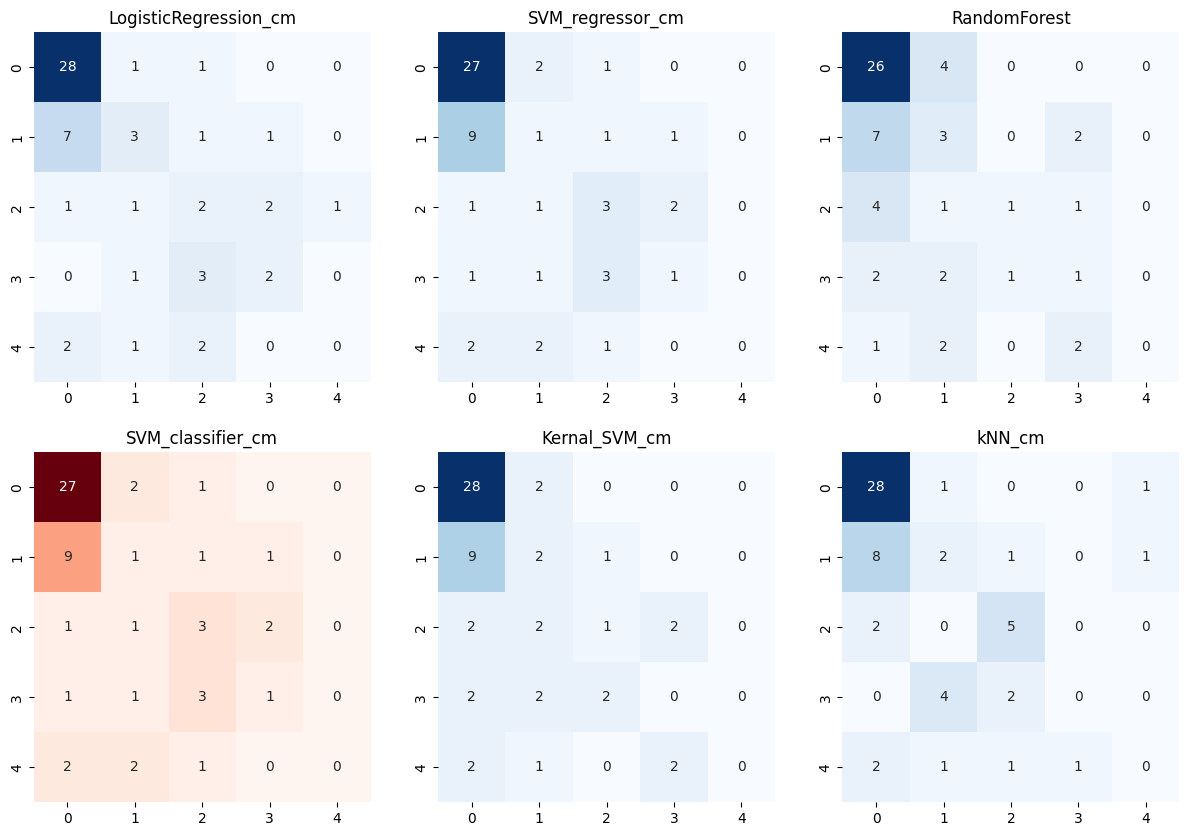

In [126]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("LogisticRegression_cm")
sns.heatmap(LR_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,2)
plt.title("SVM_regressor_cm")
sns.heatmap(SV_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,3)
plt.title("RandomForest")
sns.heatmap(RF_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,5)
plt.title("SVM_classifier_cm")
sns.heatmap(SV_cm,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.subplot(2,4,6)
plt.title("Kernal_SVM_cm")
sns.heatmap(KSV_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,7)
plt.title("kNN_cm")
sns.heatmap(KNN_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()
